# Use Case:  Language Translator
dataset consisting of pairs of English sentences and their French translation,

In [1]:
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np


In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow import keras
from keras.layers import Dense,Embedding,LSTM,RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [4]:
batch_size = 64
epochs = 100
latent_dim = 256
num_samples = 10000

data_path = 'eng_-french.csv'

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('eng_-french.csv')

In [7]:
df.head()

,English words/sentences,French words/sentences
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !


In [8]:
len(df)

175621

In [9]:
ar=np.array(df)

In [10]:
ar

array([['Hi.', 'Salut!'],
       ['Run!', 'Cours\u202f!'],
       ['Run!', 'Courez\u202f!'],
       ...,
       ["Death is something that we're often discouraged to talk about or even think about, but I've realized that preparing for death is one of the most empowering things you can do. Thinking about death clarifies your life.",
        "La mort est une chose qu'on nous décourage souvent de discuter ou même de penser mais j'ai pris conscience que se préparer à la mort est l'une des choses que nous puissions faire qui nous investit le plus de responsabilité. Réfléchir à la mort clarifie notre vie."],
       ['Since there are usually multiple websites on any given topic, I usually just click the back button when I arrive on any webpage that has pop-up advertising. I just go to the next page found by Google and hope for something less irritating.',
        "Puisqu'il y a de multiples sites web sur chaque sujet, je clique d'habitude sur le bouton retour arrière lorsque j'atterris sur n'i

In [11]:
len(ar)

175621

In [12]:
import string

In [13]:
ar[:,0]=[s.translate(str.maketrans("","",string.punctuation)) for s in ar[:,0]]

In [14]:
ar[:,1]=[s.translate(str.maketrans("","",string.punctuation)) for s in ar[:,1]]

In [15]:
ar

array([['Hi', 'Salut'],
       ['Run', 'Cours\u202f'],
       ['Run', 'Courez\u202f'],
       ...,
       ['Death is something that were often discouraged to talk about or even think about but Ive realized that preparing for death is one of the most empowering things you can do Thinking about death clarifies your life',
        'La mort est une chose quon nous décourage souvent de discuter ou même de penser mais jai pris conscience que se préparer à la mort est lune des choses que nous puissions faire qui nous investit le plus de responsabilité Réfléchir à la mort clarifie notre vie'],
       ['Since there are usually multiple websites on any given topic I usually just click the back button when I arrive on any webpage that has popup advertising I just go to the next page found by Google and hope for something less irritating',
        'Puisquil y a de multiples sites web sur chaque sujet je clique dhabitude sur le bouton retour arrière lorsque jatterris sur nimporte quelle page qui co

In [16]:
for i in range(len(ar)):
    ar[i,0]=ar[i,0].lower()
    ar[i,1]=ar[i,1].lower()

In [17]:
ar

array([['hi', 'salut'],
       ['run', 'cours\u202f'],
       ['run', 'courez\u202f'],
       ...,
       ['death is something that were often discouraged to talk about or even think about but ive realized that preparing for death is one of the most empowering things you can do thinking about death clarifies your life',
        'la mort est une chose quon nous décourage souvent de discuter ou même de penser mais jai pris conscience que se préparer à la mort est lune des choses que nous puissions faire qui nous investit le plus de responsabilité réfléchir à la mort clarifie notre vie'],
       ['since there are usually multiple websites on any given topic i usually just click the back button when i arrive on any webpage that has popup advertising i just go to the next page found by google and hope for something less irritating',
        'puisquil y a de multiples sites web sur chaque sujet je clique dhabitude sur le bouton retour arrière lorsque jatterris sur nimporte quelle page qui co

In [18]:
def tokenization(lines):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
eng_tok=tokenization(ar[:,0])
eng_vocab_size=len(eng_tok.word_index)+1

eng_length=8
print("English vocabulary size:%d" %eng_vocab_size)

English vocabulary size:14671


In [19]:
fra_tok=tokenization(ar[:,1])
fra_vocab_size=len(fra_tok.word_index)+1

fra_length=8
print("french vocabulary size:%d" %fra_vocab_size)

french vocabulary size:33321


In [20]:
def encode_sequences(tokenizer,length,lines):
    seq=tokenizer.texts_to_sequences(lines)
    seq=pad_sequences(seq,maxlen=length,padding="post")
    return seq

In [21]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(ar,test_size=0.2,random_state=12)

In [22]:
trainX=encode_sequences(eng_tok,fra_length,train[:,0])
trainY=encode_sequences(fra_tok,fra_length,train[:,1])
testX=encode_sequences(eng_tok,fra_length,test[:,0])
testY=encode_sequences(fra_tok,fra_length,test[:,1])

In [23]:
ar.shape

(175621, 2)

In [24]:
trainX.shape

(140496, 8)

In [25]:
testX.shape

(35125, 8)

In [26]:
trainX[0]

array([    9,   463,   197,     5,  1240, 10963,     0,     0],
      dtype=int32)

In [27]:
def define_model(in_vocab,out_vocab,in_timesteps,out_timesteps,units):
    model=Sequential()
    model.add(Embedding(in_vocab,units,input_length=in_timesteps,mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units,return_sequences=True))
    model.add(Dense(out_vocab,activation="softmax"))
    return model

In [28]:
model=define_model(eng_vocab_size,fra_vocab_size,eng_length,fra_length,512)
rms=keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rms,loss="sparse_categorical_crossentropy")

In [29]:
history=model.fit(trainX,trainY.reshape(trainY.shape[0],trainY.shape[1],1),
                epochs=10,batch_size=512,validation_split=0.2)

Epoch 1/10
220/220 [==============================] - 52s 203ms/step - loss: 5.8360 - val_loss: 5.1912
Epoch 2/10
220/220 [==============================] - 41s 185ms/step - loss: 5.1853 - val_loss: 5.1576
Epoch 3/10
220/220 [==============================] - 41s 188ms/step - loss: 5.1172 - val_loss: 5.1280
Epoch 4/10
220/220 [==============================] - 42s 191ms/step - loss: 5.0738 - val_loss: 5.0657
Epoch 5/10
220/220 [==============================] - 43s 193ms/step - loss: 5.0389 - val_loss: 5.0148
Epoch 6/10
220/220 [==============================] - 42s 193ms/step - loss: 4.9748 - val_loss: 4.9490
Epoch 7/10
220/220 [==============================] - 43s 194ms/step - loss: 4.9108 - val_loss: 4.9039
Epoch 8/10
220/220 [==============================] - 43s 196ms/step - loss: 4.8387 - val_loss: 4.8245
Epoch 9/10
220/220 [==============================] - 43s 195ms/step - loss: 4.7690 - val_loss: 4.7802
Epoch 10/10
220/220 [==============================] - 43s 195ms/step - l

In [31]:
import matplotlib.pyplot as plt

In [33]:
r=history

Text(0.5, 1.0, 'TRAINING AND VALIDATION LOSS')

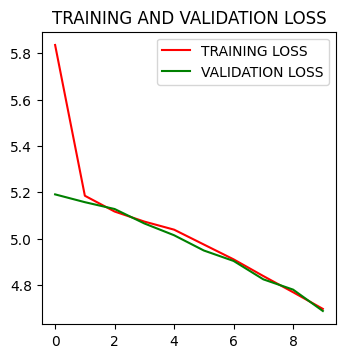

In [38]:
plt.figure(figsize=(3.8,3.8))
plt.plot(range(10),r.history["loss"],color="red",label="TRAINING LOSS")
plt.plot(range(10),r.history["val_loss"],color="green",label="VALIDATION LOSS")
plt.legend()
plt.title("TRAINING AND VALIDATION LOSS")